# Simple Linear Regression:

This  is a machine learning algorithm that lives up to it's name. Being a straightforward approach where to predict a a quantitative response **Y** we use a single predictor variable **X**.

Y ≈ β0 + β1X

In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# inspecting and uploading the data
df = pd.read_csv('/Users/yagyansh/ml-models-understanding/datasets/advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
cols_to_use = ['TV', 'Radio', 'Newspaper', 'Sales']
df = df[cols_to_use]

In [9]:
df.head()  

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [11]:
df['total_spend'] = df['TV'] + df['Radio'] + df['Newspaper']

In [12]:
df.corr() 

,TV,Radio,Newspaper,Sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
Radio,0.054809,1.000000,0.354104,0.576223,0.293211
Newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
Sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


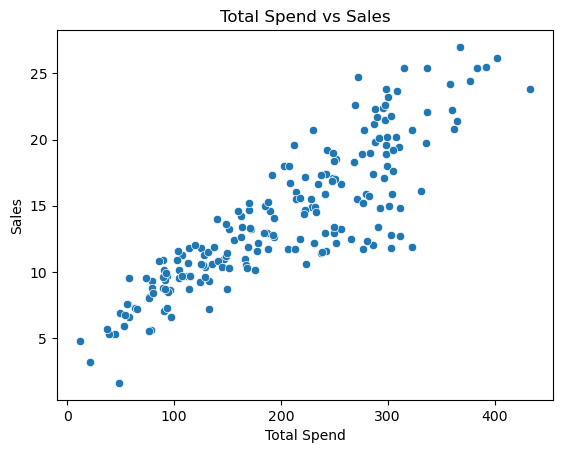

In [13]:
sns.scatterplot(x='total_spend', y='Sales', data=df)
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.title('Total Spend vs Sales')
plt.show()

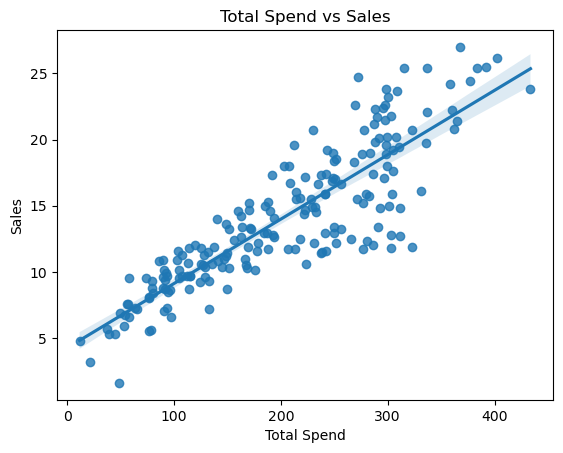

In [14]:
sns.regplot(x='total_spend', y='Sales', data=df)
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.title('Total Spend vs Sales')
plt.show()

In [15]:
# separating our features 
X = df['total_spend']
y = df['Sales']

In [16]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [17]:
np.polyfit(X, y, deg=1) 

array([0.04868788, 4.24302822])

In [18]:
potential_spend = np.linspace(0, 500, 100)

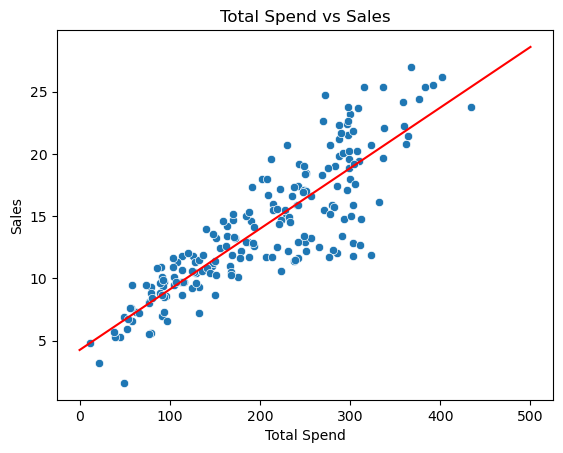

In [19]:
predicted_sales = 0.04868788*potential_spend + 4.24302822
sns.scatterplot(x='total_spend', y='Sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.title('Total Spend vs Sales')
plt.show()

In [20]:
np.polyfit(X, y, deg=2) 

array([8.21901022e-06, 4.53486875e-02, 4.51143622e+00])

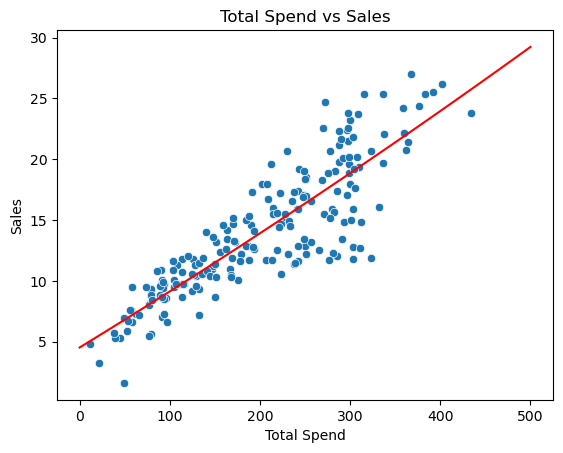

In [21]:
pot_spend = np.linspace(0, 500, 100)

predicted_sales = 8.21901022e-06*pot_spend**2 + 4.53486875e-02*pot_spend + 4.51143622e+00
sns.scatterplot(x='total_spend', y='Sales', data=df)
plt.plot(pot_spend, predicted_sales, color='red')
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.title('Total Spend vs Sales')
plt.show() 